In [35]:
# Dataset: London bike sharing dataset by HRISTO MAVRODIEV
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
warnings.filterwarnings('ignore')

data = pd.read_csv("C:/Users/pc/OneDrive/Documents/Jupyter Projects/london_merged.csv")
pd.set_option('display.max_columns', None)
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


## First lets clean and transform the dataset where appropriate

In [36]:
def dataframe_info(df):
    temp = pd.DataFrame(index=df.columns)
    temp["Datatype"] = df.dtypes
    temp["Not null values"] = df.count()
    temp["Null values"] = df.isnull().sum()
    temp["Percentage of Null values"] = (df.isnull().mean())*100
    temp["Unique count"] = df.nunique()
    return temp
dataframe_info(data)

,Datatype,Not null values,Null values,Percentage of Null values,Unique count
timestamp,object,17414,0,0.0,17414
cnt,int64,17414,0,0.0,3781
t1,float64,17414,0,0.0,73
t2,float64,17414,0,0.0,82
hum,float64,17414,0,0.0,143
wind_speed,float64,17414,0,0.0,103
weather_code,float64,17414,0,0.0,7
is_holiday,float64,17414,0,0.0,2
is_weekend,float64,17414,0,0.0,2
season,float64,17414,0,0.0,4


#### There are no missing values in any of the 10 columns 

### Convert the timestamp column to datetime 

In [37]:
data['timestamp'] = data['timestamp'].astype('datetime64[ns]')
print(data['timestamp'].dtype)
print(data['timestamp'])

datetime64[ns]
0       2015-01-04 00:00:00
1       2015-01-04 01:00:00
2       2015-01-04 02:00:00
3       2015-01-04 03:00:00
4       2015-01-04 04:00:00
                ...        
17409   2017-01-03 19:00:00
17410   2017-01-03 20:00:00
17411   2017-01-03 21:00:00
17412   2017-01-03 22:00:00
17413   2017-01-03 23:00:00
Name: timestamp, Length: 17414, dtype: datetime64[ns]


### Renaminng columns

In [38]:
data = data.rename(columns= {'cnt': 'bike_share_count', 't1':'real_temp', 't2':'feels_like_temp', 'hum':'humidity'})

### Converting values from numeric to categorical format 

In [39]:
data['weather_code'] = data['weather_code'].astype('str')

weather = {'1.0':'Clear', 
          '2.0': 'Scattered clouds',
          '3.0':'Broken clouds',
          '4.0':'Cloudy',
          '7.0':'Rain',
          '10.0':'Rain with thunder',
          '26.0':'Snowfall'}
data['weather_code'] = data['weather_code'].map(weather)


In [40]:
data['is_holiday'] = data['is_holiday'].astype('str')

holiday = {'1.0': 'Holiday',
          '0.0': 'No holiday'}

data['is_holiday'] = data['is_holiday'].map(holiday)

In [41]:
data['is_weekend'] = data['is_weekend'].astype('str')

weekend = {'1.0': 'Weekend',
          '0.0': 'Weekday'}

data['is_weekend'] = data['is_weekend'].map(weekend)

In [42]:
data['season'] = data['season'].astype('str')

season = {'0.0':'spring',
         '1.0':'summer',
         '2.0':'fall',
         '3.0':'winter'}
data['season'] = data['season'].map(season)

### Re-visualize the data

In [43]:
data.head()

,timestamp,bike_share_count,real_temp,feels_like_temp,humidity,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,No holiday,Weekend,winter
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,No holiday,Weekend,winter
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,No holiday,Weekend,winter
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,No holiday,Weekend,winter
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,No holiday,Weekend,winter


## Bike Share Count

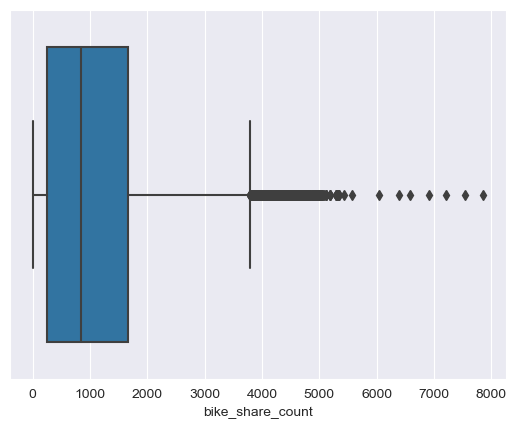

In [44]:
sns.boxplot(x='bike_share_count', data=data)
plt.show()

#### The bike share count data is heavily right skewed, therefore any summary statistic we calculate using the bike share count from here on will be the median rather than the mean to get a more accurate representation of the sample.

## Things to do:
### 1. How does weather affect bike usage?
### 2. What's the total bike rides between specific periods?
### 3. How does the bike share count vary by hour every day of the week?
### 4. Visualize changes in bike share count over time.
### 5. Write a function that calculates total bike count over a specific period of time.

## 1. How does weather affect bike usage?

### 1.1 Temperature

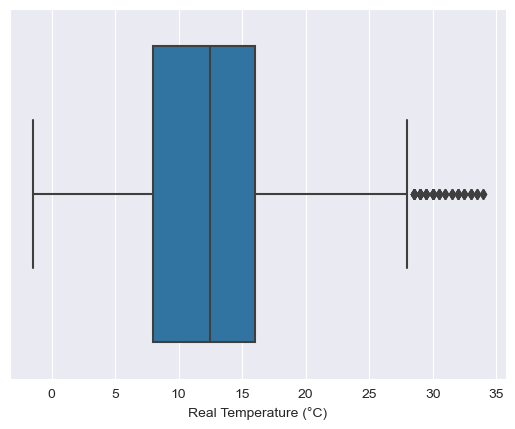

In [45]:
sns.set_style('darkgrid')
sns.boxplot(x='real_temp', data=data)
plt.xlabel('Real Temperature (°C)')
plt.show()

#### The temperature data ranges from around -5 to 35 degrees Celsius

In [46]:
real_temp_range = []
for x in data['real_temp']:
    if -5 < x <= 0:
        real_temp_range.append('-4-0')
    elif 0 < x <= 5:
        real_temp_range.append('1-5')
    elif 5 < x <=10:
        real_temp_range.append('6-10')
    elif 10 < x <= 15:
        real_temp_range.append('11-15')
    elif 15 < x <= 20:
        real_temp_range.append('16-20')
    elif 20 < x <= 25:
        real_temp_range.append('21-25')
    elif 25 < x <= 30:
        real_temp_range.append('26-30')
    elif 30 < x <= 35:
        real_temp_range.append('31-35')
        
data['real_temp_range'] = real_temp_range
data['real_temp_range'] = data['real_temp_range'].astype('category')
data['real_temp_range'] = data['real_temp_range'].cat.set_categories(new_categories=['-4-0', '1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35'], ordered=True)


In [47]:
real_temp = data.groupby('real_temp_range').agg({'bike_share_count':'median'})
print(real_temp)

                 bike_share_count
real_temp_range                  
-4-0                        100.5
1-5                         336.5
6-10                        603.0
11-15                       774.0
16-20                      1240.5
21-25                      1944.0
26-30                      2681.0
31-35                      1980.0


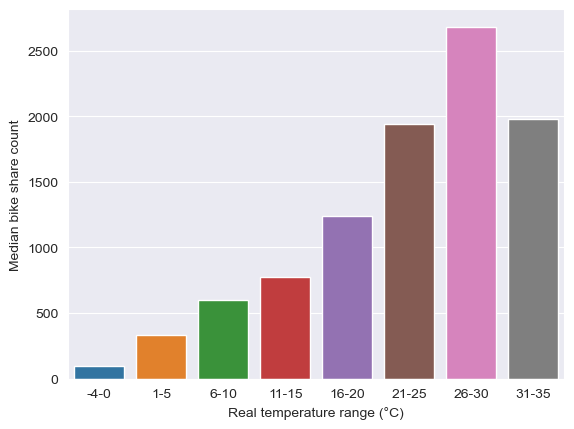

In [48]:
sns.barplot(x=real_temp.index, y='bike_share_count', data=real_temp)
plt.xlabel('Real temperature range (°C)')
plt.ylabel('Median bike share count')
plt.show()


#### - More bike share bookings are made on days when the temperature is between 26-30 degrees Celsius
#### - Bike share bookings are more favourable at higher temperatures compared to lower temperatures

### 1.2 Humidity

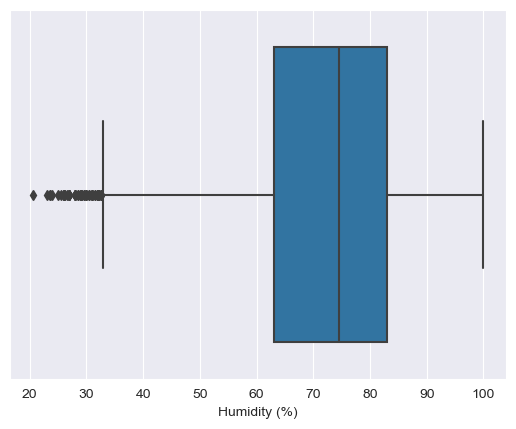

In [49]:
sns.boxplot(x='humidity', data=data)
plt.xlabel('Humidity (%)')
plt.show()

#### The humidity data ranges from 20% to 100%

In [50]:
humidity_range = []

for x in data['humidity']:
    if 20<x<=30:
        humidity_range.append('21-30')
    elif 30<x<=40:
        humidity_range.append('31-40')
    elif 40<x<=50:
        humidity_range.append('41-50')
    elif 50<x<=60:
        humidity_range.append('51-60')
    elif 60<x<=70:
        humidity_range.append('61-70')
    elif 70<x<=80:
        humidity_range.append('71-80')
    elif 80<x<=90:
        humidity_range.append('81-90')
    elif 90<x<=100:
        humidity_range.append('91-100')

data['hum_range'] = humidity_range
data['hum_range'] = data['hum_range'].astype('category')
data['hum_range'] = data['hum_range'].cat.set_categories(new_categories=['21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'], ordered=True)

In [51]:
humidity = data.groupby('hum_range').agg({'bike_share_count':'median'})
print(humidity)

           bike_share_count
hum_range                  
21-30                2438.0
31-40                2319.5
41-50                1885.5
51-60                1523.5
61-70                1075.0
71-80                 694.0
81-90                 392.0
91-100                278.5


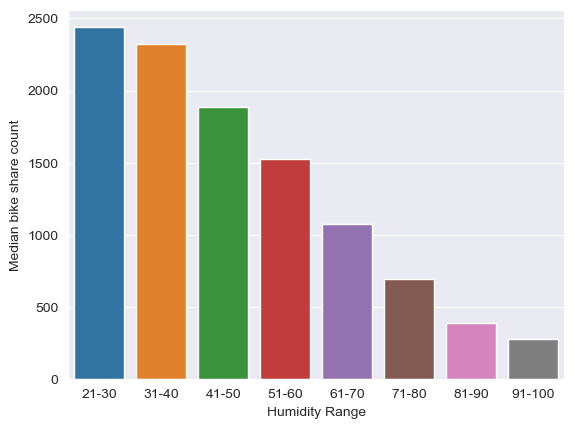

In [52]:
sns.barplot(x=humidity.index, y='bike_share_count', data=humidity)
plt.xlabel('Humidity Range')
plt.ylabel('Median bike share count')
plt.show()

#### - On average more bike share bookings are made on days where the humidity is between 21% to 30%
#### - Bike share bookings seem to be less popular as humidity increases

### 1.3 Weather Code

In [53]:
weather = data.groupby('weather_code').agg({'bike_share_count':'median'})
print(weather)

                   bike_share_count
weather_code                       
Broken clouds                 964.0
Clear                         745.0
Cloudy                        355.0
Rain                          471.0
Rain with thunder             620.5
Scattered clouds             1291.0
Snowfall                       88.0


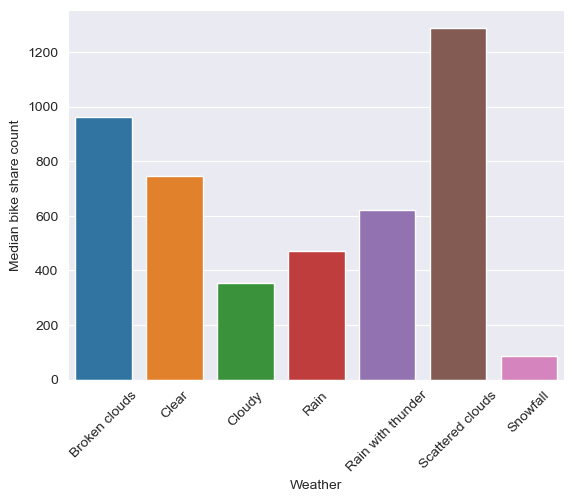

In [54]:
sns.barplot(x=weather.index, y='bike_share_count', data=weather)
plt.xlabel('Weather')
plt.ylabel('Median bike share count')
plt.xticks(rotation=45)
plt.show()

#### On average bike share bookings are more popular when there are scattered clouds

## 2. What's the total bike rides between specific periods?

In [55]:
season_rides = data.groupby('season').agg({'bike_share_count':'sum'})
print(season_rides)

        bike_share_count
season                  
fall             5073040
spring           4850236
summer           6424609
winter           3558087


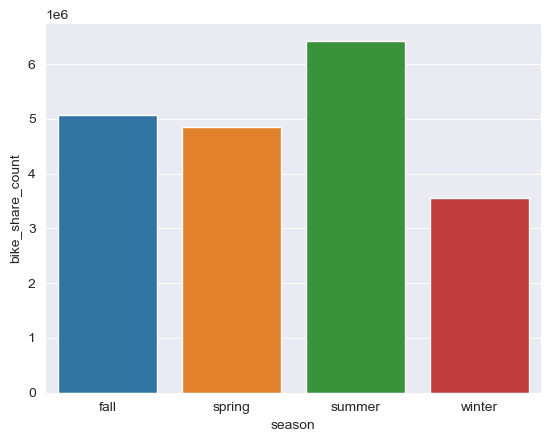

In [56]:
sns.barplot(x=season_rides.index, y='bike_share_count', data=season_rides)
plt.show()

#### Most bike share bookings were made during the summer at around 6.5 million, whilst the least bookings were made in the winter at around 3.5 million.

In [57]:
season_rides_total = season_rides['bike_share_count'].sum()
print(season_rides_total)

perc_of_total = []

for x in season_rides['bike_share_count']:
    perc_of_total.append((x/season_rides_total)*100)

season_rides['perc_of_total'] = perc_of_total
print(season_rides)

19905972
        bike_share_count  perc_of_total
season                                 
fall             5073040      25.485015
spring           4850236      24.365733
summer           6424609      32.274782
winter           3558087      17.874470


([<matplotlib.patches.Wedge at 0x1eff61aa080>,
 [Text(0.7658758712081354, 0.7895784634228442, 'fall'),
  Text(-0.785978664835827, 0.7695697099177506, 'spring'),
  Text(-0.5901015950605228, -0.9283211230533468, 'summer'),
  Text(0.9310777931919749, -0.5857423862285897, 'winter')],
 [Text(0.4177504752044374, 0.4306791618670059, '25.5%'),
  Text(-0.4287156353649965, 0.419765296318773, '24.4%'),
  Text(-0.32187359730573967, -0.5063569762109164, '32.3%'),
  Text(0.5078606144683498, -0.31949584703377615, '17.9%')])

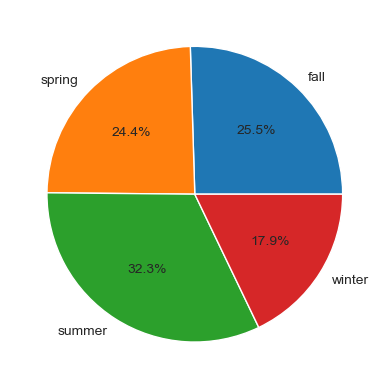

In [58]:
plt.pie(season_rides['perc_of_total'], labels = season_rides.index, autopct='%1.1f%%')

#### Of all bike share bookings made over the duration of the data collection, the most at 32.3% were made over the summer, follower by fall, spring, and with the least was winter at 17.9%.

## 3. How does the bike share count vary by hour every day of the week?

In [59]:
data['date'] = data['timestamp'].dt.date
data['day'] = data['timestamp'].dt.day
data['week'] = data['timestamp'].dt.week
data['hour'] = data['timestamp'].dt.hour
data['weekday'] = data['timestamp'].dt.weekday
data.head()

,timestamp,bike_share_count,real_temp,feels_like_temp,humidity,wind_speed,weather_code,is_holiday,is_weekend,season,real_temp_range,hum_range,date,day,week,hour,weekday
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,No holiday,Weekend,winter,1-5,91-100,2015-01-04,4,1,0,6
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,No holiday,Weekend,winter,1-5,91-100,2015-01-04,4,1,1,6
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,No holiday,Weekend,winter,1-5,91-100,2015-01-04,4,1,2,6
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,No holiday,Weekend,winter,1-5,91-100,2015-01-04,4,1,3,6
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,No holiday,Weekend,winter,1-5,91-100,2015-01-04,4,1,4,6


In [60]:
hour_by_day = data.groupby(['hour','weekday']).agg({'bike_share_count':'sum'}).unstack()
print(hour_by_day)


        bike_share_count                                                
weekday                0       1       2       3       4       5       6
hour                                                                    
0                  22097   17680   20921   22147   28715   46932   51909
1                  12445   10705   12032   13132   17991   36285   42667
2                   7759    6802    7037    8691   11592   25782   30612
3                   5121    4405    4730    5597    7624   18198   22276
4                   5445    4844    4883    5391    6397   12281   13618
5                  11671   12376   11927   12232   11677    9404   10533
6                  55828   69013   66467   67165   55343   12754   12201
7                 184797  223537  218208  218624  177014   25630   18499
8                 368004  430311  420698  421709  360790   50318   35334
9                 189265  210470  212430  223014  203576   89938   73052
10                 95992  103235  104383  110124  1

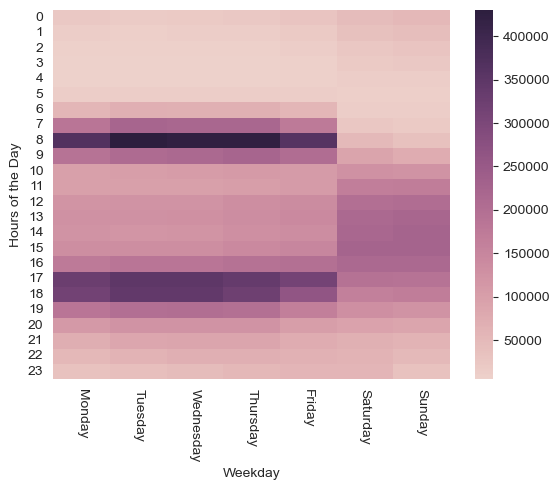

In [61]:
sns.heatmap(hour_by_day, cmap=sns.cubehelix_palette(as_cmap=True), xticklabels=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday'])
plt.xlabel('Weekday')
plt.ylabel('Hours of the Day')
plt.xticks(rotation=270)
plt.show()

#### On the weekdays, bike shares are mostly booked at 8am and around 5-6pm, whilst on the weekdays at around 2pm 

## 4. Visualize changes in bike share count over time.

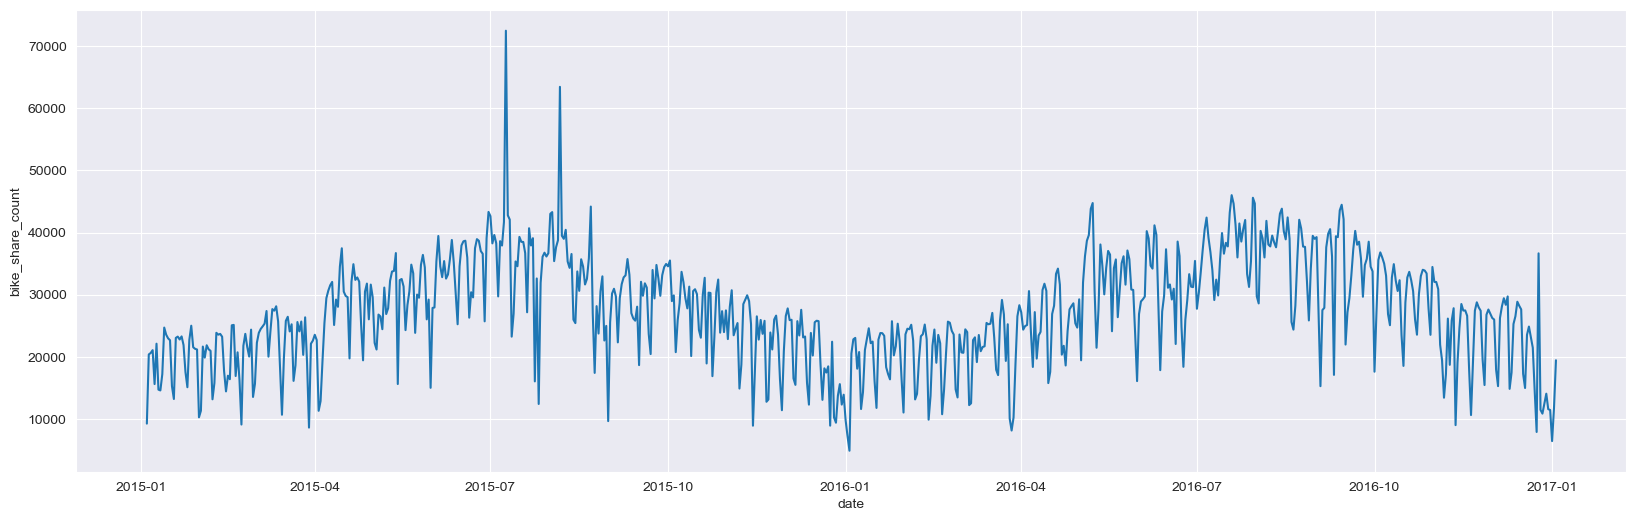

In [62]:
data2 = data.groupby('date').agg({'bike_share_count':'sum'})
plt.figure(figsize=(20,6))
sns.lineplot(x='date', y='bike_share_count', data=data2, ci=None)
plt.show()

#### We can plot a lineplot to visualize how bike share bookings change over time...

In [63]:
data2['moving_average'] = data2['bike_share_count'].rolling(14).mean()
data2

,bike_share_count,moving_average
date,,
2015-01-04,9234,NaN
2015-01-05,20372,NaN
2015-01-06,20613,NaN
2015-01-07,21064,NaN
2015-01-08,15601,NaN
...,...,...
2016-12-30,11566,17464.214286
2016-12-31,11424,17048.928571
2017-01-01,6421,16438.285714


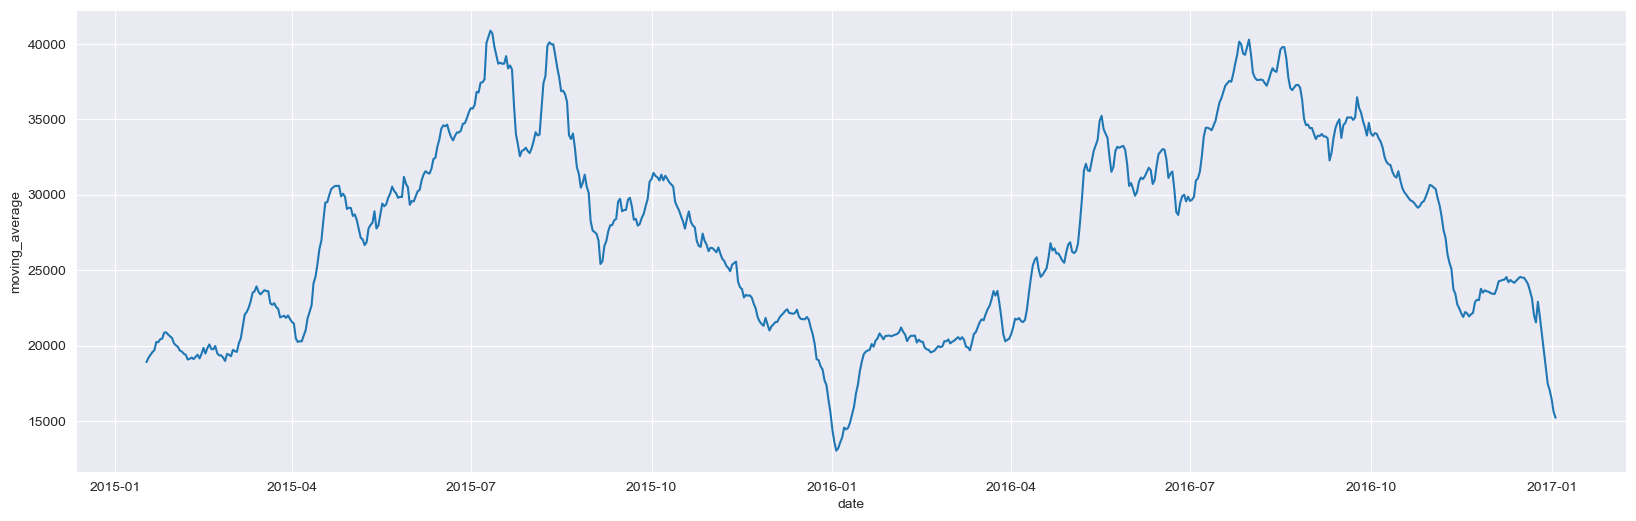

In [64]:
plt.figure(figsize=(20,6))
#sns.lineplot(x=data2.index, y='bike_share_count', data=data2, ci=None)
sns.lineplot(x=data2.index, y='moving_average', data=data2, ci=None)
plt.show()

#### We can calculate and use a 14 day moving average instead to better visualize the trend
#### It appears the most bike share bookings are made during the months July and August which confirms are earlier findings that the majority of bookings are made in the summer

## 5. Write a function that calculates total bike count over a specific period of time.

In [65]:
data2.reset_index(inplace=True)
print(data2)
print(data2['date'].dtype)

data2['date'] = data2['date'].astype('datetime64[ns]')
print(data2['date'].dtype)

def count_date(lower, upper):
    temp = data2[(data2['date'] >= lower) & (data2['date'] < upper)]
    count = temp['bike_share_count'].sum()
    return count

count_date('2015-01-04','2016-01-04')

           date  bike_share_count  moving_average
0    2015-01-04              9234             NaN
1    2015-01-05             20372             NaN
2    2015-01-06             20613             NaN
3    2015-01-07             21064             NaN
4    2015-01-08             15601             NaN
..          ...               ...             ...
725  2016-12-30             11566    17464.214286
726  2016-12-31             11424    17048.928571
727  2017-01-01              6421    16438.285714
728  2017-01-02             11823    15601.714286
729  2017-01-03             19436    15214.000000

[730 rows x 3 columns]
object
datetime64[ns]


9760607